# Import library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import seaborn as sns

# Load train, test data

In [2]:
for dirname, _, filenames in os.walk('/home/thien/project/kaggle/house_pricing'):
    for filename in filenames:
        if filename.endswith('.csv'):
            print(os.path.join(dirname, filename))

/home/thien/project/kaggle/house_pricing/submission.csv
/home/thien/project/kaggle/house_pricing/home_data/test.csv
/home/thien/project/kaggle/house_pricing/home_data/train.csv
/home/thien/project/kaggle/house_pricing/home_data/sample_submission.csv


In [3]:
X = pd.read_csv('home_data/train.csv', index_col='Id')
print(type(X))
print(X.shape)
# X.describe()
print(X.columns)
print(X.MSSubClass.describe())

<class 'pandas.core.frame.DataFrame'>
(1460, 80)
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'Ga

In [4]:
X_test_full = pd.read_csv('home_data/test.csv', index_col='Id')
print(type(X_test_full))
print(X_test_full.shape)
X_test_full.describe()

<class 'pandas.core.frame.DataFrame'>
(1459, 79)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Split train, valid data

In [5]:
n = 1460
d = 79
y = X.pop('SalePrice')
y.head()
print(X.shape)
print(y.shape)

(1460, 79)
(1460,)


In [6]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train_full.shape)
print(X_valid_full.shape)

(1168, 79)
(292, 79)


# Data preprocessing

## handle missing entry

In [7]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

float_cols = [cname for cname in X.columns if X[cname].dtype in ['float64']]
discrete_cols = [cname for cname in X.columns if X[cname].dtype in ['object', 'category', 'int64']]

imputed_X_train_full = X_train_full.copy()
imputed_X_valid_full = X_valid_full.copy()
imputed_X_test_full = X_test_full.copy()

imputed_X_train_full[float_cols] = num_imputer.fit_transform(X_train_full[float_cols])
imputed_X_valid_full[float_cols] = num_imputer.transform(X_valid_full[float_cols])
imputed_X_test_full[float_cols]  = num_imputer.transform(X_test_full[float_cols])

imputed_X_train_full[discrete_cols] = cat_imputer.fit_transform(X_train_full[discrete_cols])
imputed_X_valid_full[discrete_cols] = cat_imputer.transform(X_valid_full[discrete_cols])
imputed_X_test_full[discrete_cols]  = cat_imputer.transform(X_test_full[discrete_cols])

## Handle categorical feature

In [8]:
def encode_mixed(X_train, X_valid, X_test, threshold=10):
    X_train = X_train.copy()
    X_valid = X_valid.copy()
    X_test = X_test.copy()
    
    for col in X_train.select_dtypes(include=['object', 'category']).columns:
        n_unique = X_train[col].nunique()
        
        if n_unique < threshold:
            dummies_train = pd.get_dummies(X_train[col], prefix=col)
            dummies_valid = pd.get_dummies(X_valid[col], prefix=col)
            dummies_test  = pd.get_dummies(X_test[col],  prefix=col)
            
            X_train = X_train.drop(columns=[col])
            X_valid = X_valid.drop(columns=[col])
            X_test  = X_test.drop(columns=[col])
            
            X_train = X_train.join(dummies_train)
            X_valid = X_valid.join(dummies_valid)
            X_test  = X_test.join(dummies_test)
            
        else:
            all_values = pd.concat([X_train[col], X_valid[col], X_test[col]])
            codes, uniques = all_values.factorize(sort=True)
            
            n_train = len(X_train)
            n_valid = len(X_valid)
            
            X_train[col] = codes[:n_train]
            X_valid[col] = codes[n_train:n_train + n_valid]
            X_test[col]  = codes[n_train + n_valid:]
    
    X_train, X_valid = X_train.align(X_valid, join='left', axis=1, fill_value=0)
    X_train, X_test  = X_train.align(X_test, join='left', axis=1, fill_value=0)
    
    return X_train, X_valid, X_test

In [9]:
X_train, X_valid, X_test = encode_mixed(imputed_X_train_full, imputed_X_valid_full, imputed_X_test_full, threshold=10)

## Feature analysis

In [10]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

discrete_features = X_train.dtypes == int
print(X_train.columns[discrete_features].tolist())
mi_scores = make_mi_scores(X_train, y_train, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

['MSSubClass', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold']


OverallQual         0.562317
GrLivArea           0.440551
TotalBsmtSF         0.362690
MSSubClass          0.284002
ExterQual_TA        0.245108
                      ...   
MiscVal             0.000000
PoolArea_0          0.000000
PoolArea_512        0.000000
PoolQC_Fa           0.000000
MiscFeature_Othr    0.000000
Name: MI Scores, Length: 91, dtype: float64

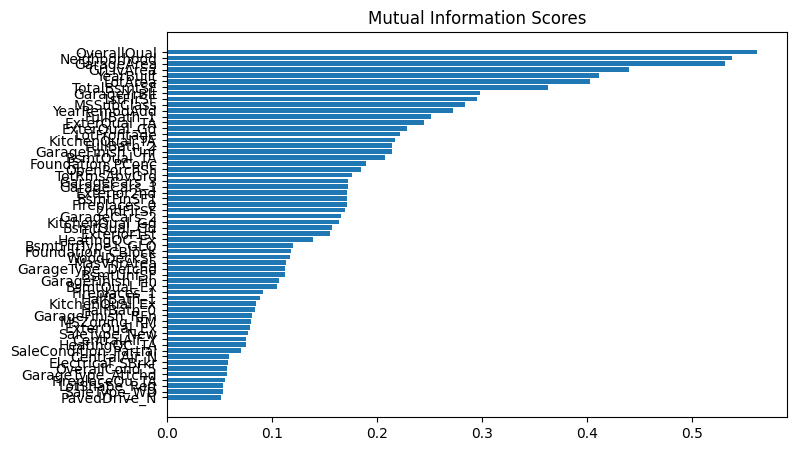

In [11]:
def plot_mi_scores(scores, n_col=20):
    scores = scores.sort_values(ascending=True)
    scores = scores[len(scores) - n_col:]  # Show only the top n_col features
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores, 60)

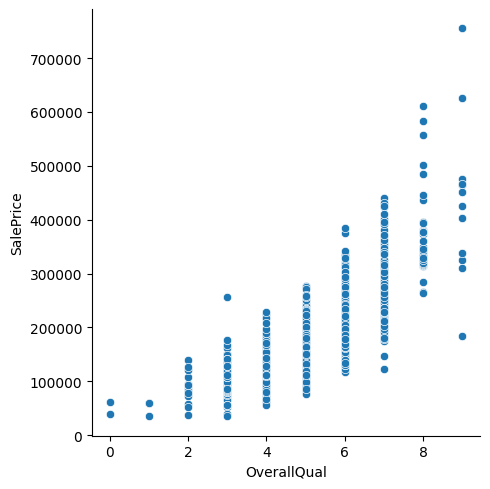

In [12]:
sns.relplot(x="OverallQual", y="SalePrice", data=pd.concat([X_train, y_train], axis=1))

In [13]:
choosen_features = [col for col in mi_scores.index if mi_scores[col] > 0.01]
print(choosen_features)
print(len(choosen_features))

['OverallQual', 'Neighborhood', 'GarageArea', 'GrLivArea', 'YearBuilt', 'LotArea', 'TotalBsmtSF', 'GarageYrBlt', '1stFlrSF', 'MSSubClass', 'YearRemodAdd', 'FullBath_1', 'ExterQual_TA', 'ExterQual_Gd', 'LotFrontage', 'KitchenQual_TA', 'FullBath_2', 'GarageFinish_Unf', 'BsmtQual_TA', 'Foundation_PConc', 'OpenPorchSF', 'TotRmsAbvGrd', 'GarageCars_3', 'GarageCars_1', 'Exterior2nd', 'BsmtFinSF1', 'Fireplaces_0', '2ndFlrSF', 'GarageCars_2', 'KitchenQual_Gd', 'BsmtQual_Gd', 'Exterior1st', 'HeatingQC_Ex', 'BsmtFinType1_GLQ', 'Foundation_CBlock', 'WoodDeckSF', 'MasVnrArea', 'GarageType_Detchd', 'BsmtUnfSF', 'GarageFinish_Fin', 'BsmtQual_Ex', 'Fireplaces_1', 'HalfBath_1', 'KitchenQual_Ex', 'HalfBath_0', 'GarageFinish_RFn', 'MSZoning_RM', 'ExterQual_Ex', 'SaleType_New', 'CentralAir_Y', 'HeatingQC_TA', 'SaleCondition_Partial', 'CentralAir_N', 'Electrical_SBrkr', 'OverallCond_5', 'GarageType_Attchd', 'FireplaceQu_TA', 'LotShape_Reg', 'SaleType_WD', 'PavedDrive_N', 'FireplaceQu_Gd', 'MasVnrType_Ston

In [14]:
final_X_train = X_train[choosen_features]
final_X_valid = X_valid[choosen_features]
final_X_test = X_test[choosen_features]

# final_X_train = X_train
# final_X_valid = X_valid
# final_X_test = X_test

# Train model

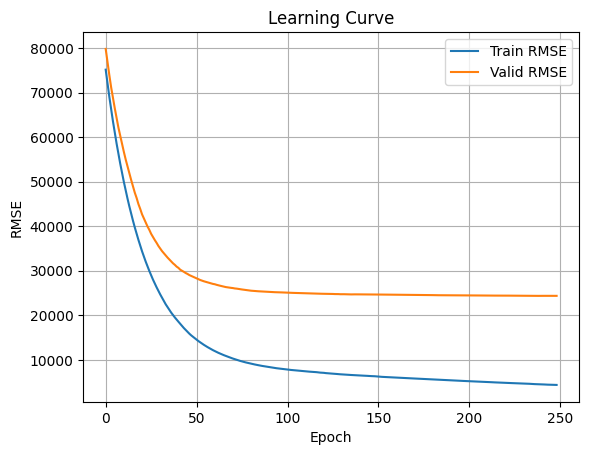

In [15]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=10, random_state=0, eval_metric="rmse")

evals_result = {}
model.fit(final_X_train, y_train, 
             eval_set=[(final_X_train, y_train), (final_X_valid, y_valid)], 
             verbose=False)
evals_result = model.evals_result()
results = evals_result
epochs = len(results["validation_0"]["rmse"])

plt.plot(range(epochs), results["validation_0"]["rmse"], label='Train RMSE')
plt.plot(range(epochs), results["validation_1"]["rmse"], label='Valid RMSE')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()


# Shap explaination

In [16]:
# import shap
# import numpy as np
# # Khởi tạo SHAP explainer
# explainer = shap.Explainer(model, np.array(X_train))

# # Tính SHAP values
# shap_values = explainer(X_test)


In [17]:
# shap.summary_plot(shap_values, X_test)

In [18]:
# shap.initjs()

In [19]:
# # Force plot cho mẫu đầu tiên
# shap.plots.force(shap_values[0])

# Validation

In [20]:
from sklearn.metrics import root_mean_squared_error
valid_pred = model.predict(final_X_valid)
print(valid_pred[:5])
print(y_valid[:5])
rmse = root_mean_squared_error(y_valid, valid_pred)
print("Root Mean Squared Error:", rmse)

[244389.2   149216.6   118950.836 209797.45   86118.67 ]
Id
530    200624
492    133000
460    110000
280    192000
656     88000
Name: SalePrice, dtype: int64
Root Mean Squared Error: 24366.2265625


# Predict result

In [21]:
y_pred = model.predict(final_X_test)
print(y_pred[:5])
output = pd.DataFrame({'Id': X_test.index, 'SalePrice': y_pred})
output.to_csv('submission.csv', index=False)
print("Submission saved to 'submission.csv'")

[122164.04 152010.12 190988.45 197426.61 194326.31]
Submission saved to 'submission.csv'
